In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
from scipy.io import loadmat
from scipy import optimize
import math

from scipy import ndimage
import pandas as pd

In [14]:
def displaydata(X, *ex_width):
    if ex_width == ():
        ex_width = round(np.sqrt(X.shape[1]))

    m, n = X.shape
    rows = math.floor(np.sqrt(m))
    cols = math.ceil(m/rows)
    fig, ax = plt.subplots(nrows=rows,
                            ncols=cols,
                            sharey=True,
                            sharex=True,
                            figsize=(8,8))
    fig.suptitle('100 Characters', fontsize=16)

    for row in range(rows):
        for column in range(cols):
            x = X[rows*row+column].reshape(20,20)
            x = ndimage.rotate(x, -90)
            x = np.fliplr(x)
            ax[row, column].matshow(x, cmap='gray_r')
    plt.xticks([])
    plt.yticks([])

In [15]:
def sigmoid(z):
    return 1 /(1 + np.exp(-z))

In [16]:
def sigmoidgradient(z):
    return sigmoid (z) * (1 - sigmoid(z))

In [17]:
def nnCostFunction (nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, Labmda):

    Theta1 = nnparams[:hidden_layer_size * (input_layer_size + 1)]
    Theta1 = Theta1.reshape(hidden_layer_size, input_layer_size + 1)
    Theta2 = nnparams[:hidden_layer_size * (input_layer_size + 1)]
    Theta2 = Theta2.reshape(hidden_layer_size, input_layer_size + 1)

    temp1 = Theta1.copy() # (25, 401)
    temp2 = Theta2.copy() # (10, 26)
    print(temp1)
    temp1[:, 0] = 0
    temp2[:, 0] = 0
    print(temp1)

    m, n = X.shape
    Theta1_grad = np.zeros_like(Theta1)
    Theta2_grad = np.zeros_like(Theta2)

    Y = np.zeros((X.shape[0], num_labels)) # (5000, 10)
    Y[np.arrange(m), y.flatten() - 1] = 1

    a1 = np.hstack((np.ones((m, 1)), X))
    z2 = a1.dot(Theta1.T) # (5000, 25)
    a2 = sigmoid(z2) # (5000, 25)
    a2 = np.hstack((np.ones((m, 1)), a2))
    z3 = a2.dot(Theta2.T) # (5000, 10)
    a3 = sigmoid(z3)
    h = a3 # (5000, 10)

    reg_term = Lambda / (2*m) * (np.sum(temp1**2) + np.sum(temp2**2))
    J = (1/m) * np.sum(np.sum(-Y * np.log(h) - (1-Y) * np.log(1-h), axis = 1))
    J += reg_term
    
    return J

================== Beginning ==================

Loading Data...

Loading 100 Random Characters...



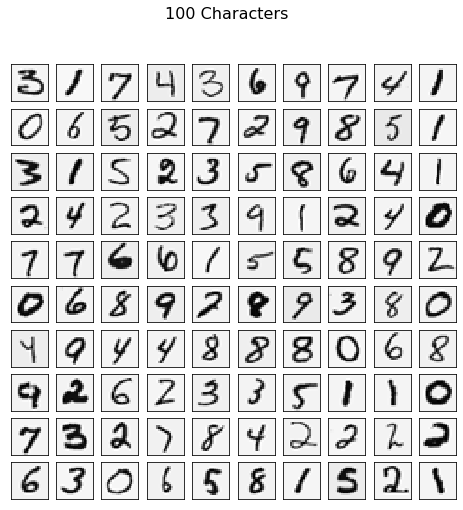

In [18]:
# if __name__ == '__main__':

input_layer_size = 400
hidden_layer_size = 25
num_labels = 10

# ========= 1. Loading and Visualizing Data ============
# Load Training Data
print('='*18, "Beginning", '='*18)
print("\nLoading Data...\n")

pathdata = 'ex4data1.mat'
path = os.path.join('/Users/mackt/Python/Machine Learning/Data', pathdata)
data = loadmat(path)
# 5000 20pix x 20pix characters
X = data['X'] # (5000, 400)
m, n = X.shape
# Category of each character
y = data['y'] # (5000, 1)

# # 100 Random Characters
print("Loading 100 Random Characters...\n")
index = np.random.choice(m,size=100, replace=False)
# print(index)
# print(y[index, 0])
displaydata(X[index])
plt.show()

In [19]:
# ========= 2. Loading Pre-Determined Parameters ============
# Load Pre-Determined Parameters
print('='*40)
print("\nLoading Pre-Determined Parameters...\n")

pathdata = 'ex4weights.mat'
path = os.path.join('/Users/mackt/Python/Machine Learning/Data', pathdata)
pre_weights = loadmat(path)

Theta1 = pre_weights['Theta1'] # (25, 401)
Theta2 = pre_weights['Theta2'] # (10, 26)

nn_params = np.vstack((np.reshape(Theta1, (-1, 1)), np.reshape(Theta2, (-1, 1))))


Loading Pre-Determined Parameters...



In [27]:
nn_params = np.vstack((np.reshape(Theta1, (-1, 1)), np.reshape(Theta2, (-1, 1))))

# ========= 3. Feedforward - Compute Cost ============
print('='*40)

# Weight Regularization Parameter
Lambda = 0
# Cost Function
J, grad = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, Lambda)

print('\nCost at Pre-Determined Parameters: ', J)
print('\nAnswer: 0.287629')

NameError: name 'nnparams' is not defined